# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

**Student**: Andrew Caide
<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

N/A


<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [3]:
## Code here
file = 'dataset_1.csv'
df = pd.read_csv(file)
df.head()
rand_state = 42
test_size = 0.2
train_data, test_data = train_test_split(df, random_state = rand_state, test_size = test_size)



**1.2**

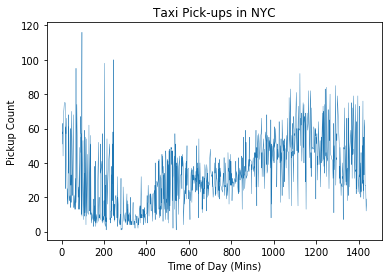

In [4]:
## Code for your plot here
# Cleaning up
train_data  = train_data.sort_values('TimeMin')
test_data  = test_data.sort_values('TimeMin')
##


plt.plot(train_data['TimeMin'], train_data['PickupCount'],linewidth = 0.4 )
plt.xlabel('Time of Day (Mins)')
plt.ylabel('Pickup Count')
plt.title('Taxi Pick-ups in NYC')
plt.show()



**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

Yes - we have our peak operations kicking in during the early morning rush (400 - 600 mins, 6am-9am). The trend continues to rise during the day, and it gets quiet in the early morning. It's NYC, so it's always busy unless people should really be asleep (1AM - 4AM). 

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [5]:
## Code here

predictor = 'TimeMin'
response = 'PickupCount'
KNNModels = {}

for k in [1, 10, 75, 250, 500, 750, 1000]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(train_data[[predictor]], train_data[response])
    KNNModels[k] = knnreg

**2.2**

Below is a 2 by 7 subplot of all fits:



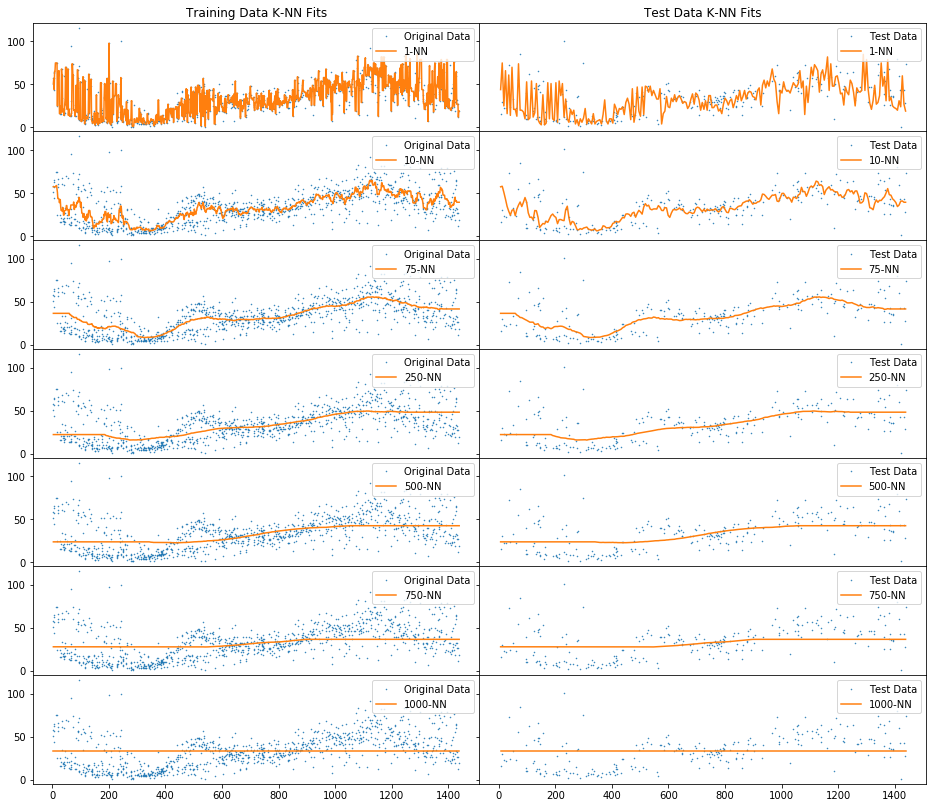

In [6]:
## Code for your plot here


print("Below is a 2 by 7 subplot of all fits:")
fig, ((tr1, te1), (tr2, te2), (tr3, te3), (tr4, te4), 
      (tr5, te5), (tr6, te6), (tr7, te7)) = plt.subplots(7, 2, 
                          sharex=True, sharey=True,gridspec_kw={'hspace':0, 'wspace': 0},
                          figsize=(16,14))
j = 0

traingrid = np.linspace(np.min(train_data[predictor]), 
                    np.max(train_data[predictor]), 
                    len(train_data[predictor]))
testgrid = np.linspace(np.min(test_data[predictor]), 
                    np.max(test_data[predictor]), 
                    len(test_data[predictor]))

for i, ax in enumerate(fig.axes):
    # odd i's are training
    # even i's are test
    k = list(KNNModels.keys())[j]
    
    if i%2 == 0:
        
        ax.plot(train_data[predictor], train_data[response], 'o', 
                markersize = 0.5, label='Original Data')
        predictions = KNNModels[k].predict(traingrid.reshape(len(train_data[predictor]),1))
        ax.plot(traingrid, predictions, label="{}-NN".format(k))
        ax.legend(loc = "upper right")
        if i == 0:
            ax.set_title("Training Data K-NN Fits")
    else:
        ax.plot(test_data[predictor], test_data[response], 'o', 
                markersize = 0.5, label='Test Data')
        predictions = KNNModels[k].predict(testgrid.reshape(len(test_data[predictor]),1))
        ax.plot(testgrid, predictions, label="{}-NN".format(k))
        ax.legend(loc = "upper right")
        if i == 1:
            ax.set_title("Test Data K-NN Fits")        
        j+=1
print()

Below is an overlay of our regressions fit to the training data: 



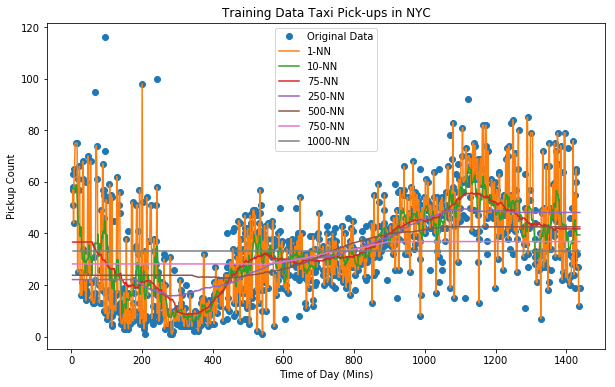

In [7]:

print("Below is an overlay of our regressions fit to the training data: ")
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(train_data[predictor], train_data[response], 'o', label='Original Data')
for k in KNNModels.keys():
    predictions = KNNModels[k].predict(traingrid.reshape(len(train_data[predictor]),1))
    ax.plot(traingrid, predictions, label="{}-NN".format(k))
ax.set_xlabel('Time of Day (Mins)')
ax.set_ylabel('Pickup Count')
ax.set_title('Training Data Taxi Pick-ups in NYC')
ax.legend();
print()

Below is an overlay of our regressions fit to the test data: 

It can be seen that the fits for k = 1 and 10 are as noisy as the data, which indicates that they may have been overfitted to the training data. On the other hand, fits greater than k = 500 have been underfitted and are nearly horizontal lines (at y = mean(y)). Neither extemes are useful. This behavior can also be observed above.


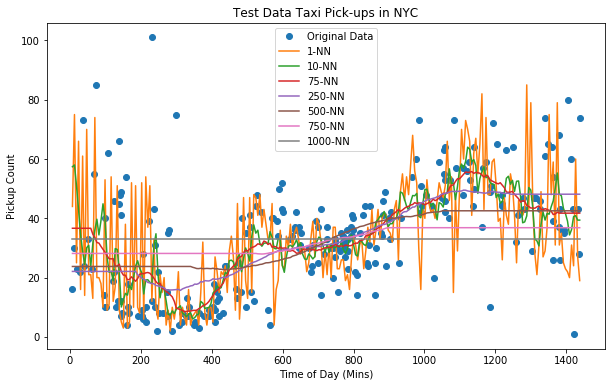

In [8]:
print("Below is an overlay of our regressions fit to the test data: ")
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(test_data[predictor], test_data[response], 'o', label='Original Data')
for k in KNNModels.keys():
    predictions = KNNModels[k].predict(testgrid.reshape(len(test_data[predictor]),1))
    ax.plot(testgrid, predictions, label="{}-NN".format(k))
ax.set_xlabel('Time of Day (Mins)')
ax.set_ylabel('Pickup Count')
ax.set_title('Test Data Taxi Pick-ups in NYC')
ax.legend();
print()
print("It can be seen that the fits for k = 1 and 10 are as noisy as the data,\
 which indicates that they may have been overfitted to the training data. On the other hand,\
 fits greater than k = 500 have been underfitted and are nearly horizontal lines (at y = mean(y)).\
 Neither extemes are useful. This behavior can also be observed above.")

**2.3**

In [9]:
## Code here
scores_train = []
scores_test = []
scores_train_dic = {}
scores_test_dic = {}
for k in KNNModels.keys():
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(train_data[[predictor]], train_data[response])
    score_test = knnreg.score(test_data[[predictor]], test_data[response])
    scores_test.append(score_test)
    scores_test_dic[k] = score_test
    score_train = knnreg.score(train_data[[predictor]], train_data[response])
    scores_train.append(score_train)
    scores_train_dic[k] = score_train
    
print("The k:R2 scores for the training data is outlined below: ")
print(scores_train_dic)
print()
print("And below are the k:R2 scores for the testing data: ")
print(scores_test_dic)

The k:R2 scores for the training data is outlined below: 
{1: 0.6976547697023554, 10: 0.513343250930556, 75: 0.44572973749764094, 250: 0.35529769225415164, 500: 0.2903395165978232, 750: 0.1794380306370884, 1000: 0.0}

And below are the k:R2 scores for the testing data: 
{1: -0.2714252298117017, 10: 0.2762280042068823, 75: 0.39068929162482, 250: 0.34034249955430307, 500: 0.27035523391406946, 750: 0.16494073429186784, 1000: -0.0003843303764170524}


**2.4**

Text(0.5,1,'R2 of the k-NN fit to the Training Data and Test Data.')

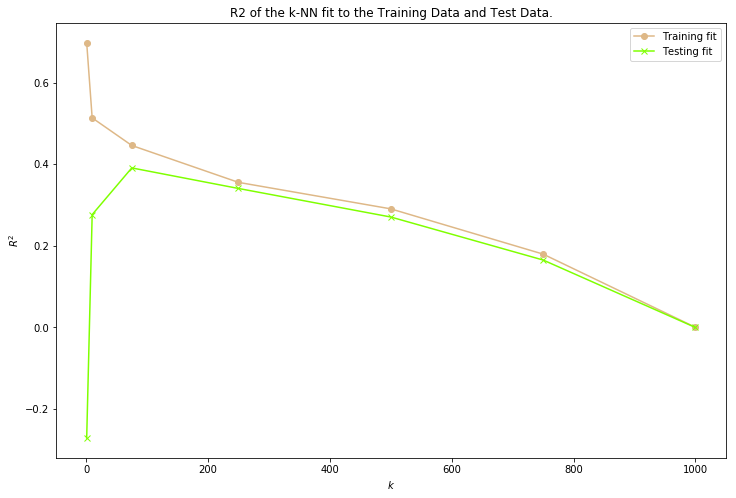

In [10]:
## Code for your plot here

ks = [k for k in KNNModels.keys()]
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-', color = 'burlywood', label = "Training fit")
ax.plot(ks, scores_test,'x-', color='chartreuse', label = "Testing fit")
ax.legend()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.set_title("R2 of the k-NN fit to the Training Data and Test Data.")

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  


In [11]:
pred1000 = str(np.mean(KNNModels[1000].predict(traingrid.reshape(len(train_data[predictor]),1))))

print()
print("ANS:")
print()
print("It appears that as k approaches n, our regression rapidly arrives to a horizontal slope at\
 y = mean(y). The mean of train_data[response] is " + str(np.mean(train_data[response])) +",\
 while the predictions from the \
 k-NN regression with k=n neighboors are all " + pred1000+".")


ANS:

It appears that as k approaches n, our regression rapidly arrives to a horizontal slope at y = mean(y). The mean of train_data[response] is 33.156, while the predictions from the  k-NN regression with k=n neighboors are all 33.156.



2. *What does an $R^2$ score of $0$ mean?*

ANS:

R2 is a measure of how close the regression fits the data compared to how the mean fits the data. An R2 of 0 indicates that the model fails to explain the variance of the data around the mean.
    

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

In [12]:
print()
print("ANS: ")
print()
print("A negative R2 means the model does a much worse job at explaining the data than by simply\
 taking the mean of the data.")
print()
print("There are no negative R2 results in the training data; and this should make since this is what was used\
 to train to the model. However, there are " + str(len([x for x in scores_test if x < 0])) + " results\
 from our test: "+ ', '.join([str(round(x,4)) for x in scores_test if x < 0])  +".")


ANS: 

A negative R2 means the model does a much worse job at explaining the data than by simply taking the mean of the data.

There are no negative R2 results in the training data; and this should make since this is what was used to train to the model. However, there are 2 results from our test: -0.2714, -0.0004.


4.*Do the training and test $R^2$ plots exhibit different trends?  Describe.*  


Yes, the plots are somewhat inverses until n when k for the test-data fit is maxed,\
 then both curves move assymptotically towards 0. Initially the model is overfitted to the\
 test data, but after n at max(k), the model underfits the data.


5.*How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

For the model fit back to the training data, R2 is relatively meaningless at super low \
(between 0 and 10) due to overfitting; it should be expected that R2 at these ranges should be\
relatively high. R2 starts dropping rapidly after 500 due to overfitting the model.

For the model fit to the test data, R2 is negative at extremely low (k = 0) and high (k = n/2) ends. 
However there is a maximum value at about k = 75; the R2 values steadily drop back to negative thereafter.
    
    
6.*What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

In [13]:
bestR2_train = str(round(max(scores_train),2))
bestK_train = str(round(list(KNNModels.keys())[scores_train.index(max(scores_train))],3))

bestR2_test = str(round(max(scores_test),2))
bestK_test = str(round(list(KNNModels.keys())[scores_test.index(max(scores_test))],3))

print()
print("ANS: ")
print()
print("From fitting the model back to the data it was trained on,\
 the best (greatest) R2 from this regression is " + bestR2_train +".\
 This score is achieved with a k value of "+ bestK_train +".")
print()
print("By fitting the model to test data, we achieved a different R2 and K value.\
 The best R2 obtained from applying the model to the test data is " + bestR2_test +".\
 This score is achieved with a k value of "+ bestK_test +".")


ANS: 

From fitting the model back to the data it was trained on, the best (greatest) R2 from this regression is 0.7. This score is achieved with a k value of 1.

By fitting the model to test data, we achieved a different R2 and K value. The best R2 obtained from applying the model to the test data is 0.39. This score is achieved with a k value of 75.


<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [14]:
## Code here
import statsmodels.api as sm

predictor = 'TimeMin'
response = 'PickupCount'

X = sm.add_constant(train_data[predictor])
OLSClass = sm.OLS(train_data[response], X)
OLSModel = OLSClass.fit()


**3.2**

Below is a subplot of all of the solution:


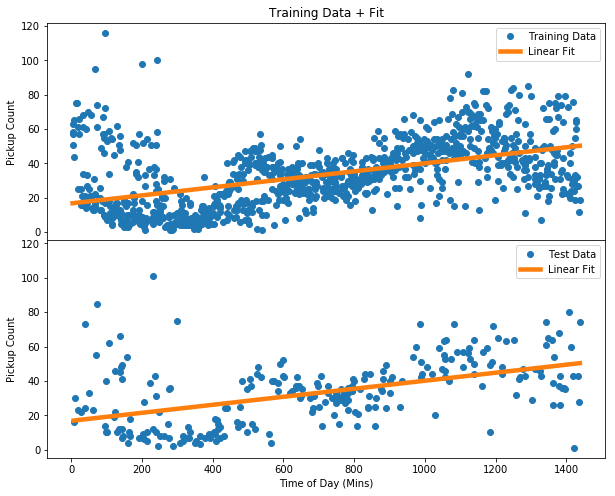

In [15]:
## Code for your plot here

m = OLSModel.params[1]
b = OLSModel.params[0]



##################
def solve_lin(m : int, b : int, x : np.ndarray) -> np.ndarray:
    '''
    Produces an array (len(x),1) which fits a simple linear model: m*x+b
    
    Args:
        X should be a numpy array(len(x),1) of the x positions from the raw data set
    
    Returns:
        numpy array(len(x),) of the solutions to m*x+b, and x
        
    '''
    x_space = np.linspace(np.min(x),np.max(x), len(x))
    y = m*x_space+b
    return(y, x_space)
##################


y_train, x_train = solve_lin(m,b,train_data[predictor])
y_test, x_test = solve_lin(m,b,test_data[predictor])

# I don't feel safe throwing these into a function; plots should to be carefully designed
print("Below is a subplot of all of the solution:")
fig, ((tr1, te1)) = plt.subplots(2, 1, sharex=True, sharey=True,
                        gridspec_kw={'hspace':0, 'wspace': 0},
                        figsize=(10,8))
tr1.plot(train_data[predictor], train_data[response], 'o', label='Training Data')
tr1.plot(x_train, y_train, '-', linewidth = 4.5, label = 'Linear Fit')
tr1.set_xlabel('Time of Day (Mins)')
tr1.set_ylabel('Pickup Count')
tr1.set_title('Training Data + Fit')
tr1.legend(loc = 'upper right')

te1.plot(test_data[predictor], test_data[response], 'o', label='Test Data')
te1.plot(x_test, y_test, '-', linewidth = 4.5, label = 'Linear Fit')
te1.set_xlabel('Time of Day (Mins)')
te1.set_ylabel('Pickup Count')
te1.legend(loc = 'upper right')

    


**3.3**

In [ ]:
## Code here
print("There are no obvious methods of fitting data onto this model with the OLS package...")



**3.4**

In [16]:
## Code here
print("The slope for the fitted linear model is: " + str(round(m,3)) + 
      ", and the intercept is: "+ str(round(b,3)) +".")

The slope for the fitted linear model is: 0.023, and the intercept is: 16.751.


**3.5**

In [17]:
## Code here
CIs = OLSModel.conf_int(alpha=0.05, cols=None)
print("The confidence intervals for the slope is (" +str(round(CIs[0][1],2)) +" ,"+str(round(CIs[1][1],2)) + "),\
 and the confidence intervals for the intercept is ("+ str(round(CIs[0][0],2)) + 
 " ,"+ str(round(CIs[1][0],2)) +").")


The confidence intervals for the slope is (0.02 ,0.03), and the confidence intervals for the intercept is (14.68 ,18.83).


**3.6**

Text(0.5,1,'Risuduals of Linear Regression Model vs Time of Day')

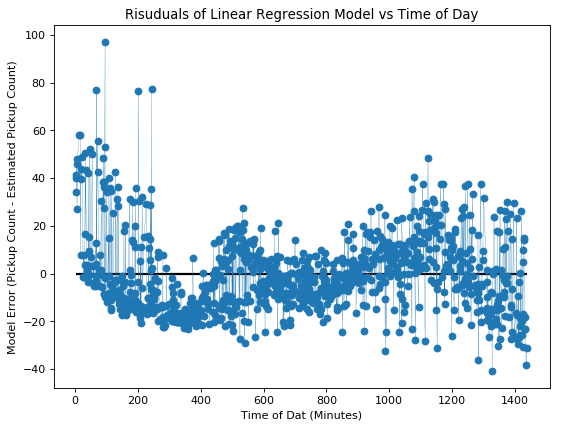

In [18]:
e = train_data[response] - y_train

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hlines(y=0, xmin= min(train_data[predictor]), xmax = max(train_data[predictor]), linewidth = 2)
plt.plot(train_data[predictor], e, '-o', linewidth = .25)
plt.xlabel('Time of Dat (Minutes)')
plt.ylabel('Model Error (Pickup Count - Estimated Pickup Count)')
plt.title('Risuduals of Linear Regression Model vs Time of Day')



**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

$R^2$ for the OLS Fit, 0.243 (OLSModel.rsquared), is worse than the k-NN fit at k=75, $R^2$ = 0.39.

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

The sign of the slope indicates the relationship between expected number of pickups and the time of day; a positive slope suggests more traveling/moving around, and a negative slope suggests a decrease in people moving around (hailing cabs). It would not be a good idea, in this case, to report a slope for the entire day. Instead we should segment the day into time-period, such as 12AM-6AM, 6AM-12PM, 12PM-6PM, 6PM-12AM (I would recommend breaking it down even further to capture rush-hour periods such as going to work in the AM, lunch, leaving work, etc. 


3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
The confidence intervals do not include 0; these results are reliable.

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

Looser: a $99%$ CI aims to capture more points than a $95%$ CI. If we were to do a $100%$ CI, it would span the entire plotting space.

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

The incredibly small, positive slope indicates two things: 1) movement in NYC is relatively stable throughout time, and 2) the population of NYC might be increasing, as more cabs are hailed over time. Printing OLSModel.summary() reveals P values >0.000, which mean they're statistically significant results. While I am hesistant to describe this data as linear (I'd prefer oscillatory, or sinusoidal), assumptions of linearity may be made based off the statistical results.  


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [19]:

np.set_printoptions(precision=3)


class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
    def fit(self):
        #################
        # Your Code below
        #################
        
        # do something with self.exog and self.endog to calculate 
        # your linear regression coefficients
        # store the result in self.params
        xbar = np.mean(self.exog)
        ybar = np.mean(self.endog)
        numerator = np.sum((self.exog-xbar)*(self.endog-ybar))
        denom = np.sum((self.exog-xbar)**2)
        m = numerator/denom
        b = ybar - m*xbar
        params = [m,b]
        
        return(params)
            
    def predict(self):
        
        params = self.fit()
        return(self.exog*params[0]+params[1])
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        
        
def CS109r2score(y_true, y_pred):
    
    #################
    # Your Code below
    #################
    
    # y_true should be your actual y_data (endogenous data)
    # y_pred should be the corresponding predictions from your model
    
    # calculate the r^2 score an return it
    SSres = np.sum((np.sort(y_true)-np.sort(y_pred))**2)
    SStot = np.sum((y_true-np.mean(y_true))**2)
    return(1-SSres/SStot)


**4.2**

In [20]:
## Code here
CS109OLSinfo = CS109OLS(train_data[response],train_data[predictor])
CS109OLSModel = CS109OLSinfo.predict()
m1, b1 = CS109OLSinfo.fit()

**4.3**

Below is a subplot of all of the solution:


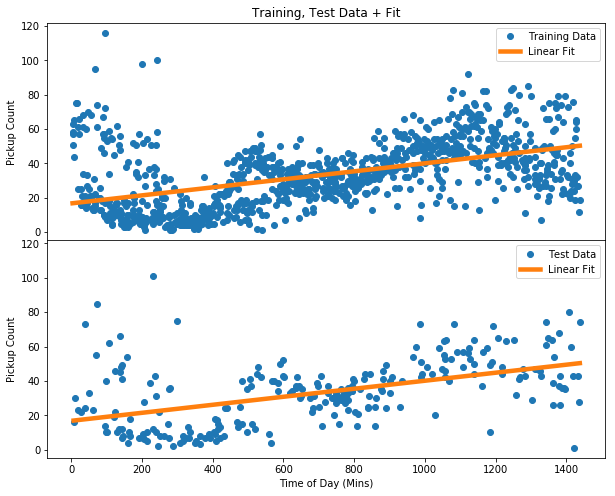

In [21]:
## Code for your plot here
y_train, x_train = CS109OLSModel, train_data[predictor]#This ti
y_test, x_test = solve_lin(m1,b1,test_data[predictor])

print("Below is a subplot of all of the solution:")
fig, ((tr1, te1)) = plt.subplots(2, 1, sharex=True, sharey=True,
                        gridspec_kw={'hspace':0, 'wspace': 0},
                        figsize=(10,8))
tr1.plot(train_data[predictor], train_data[response], 'o', label='Training Data')
tr1.plot(x_train, y_train, '-', linewidth = 4.5, label = 'Linear Fit')
tr1.set_xlabel('Time of Day (Mins)')
tr1.set_ylabel('Pickup Count')
tr1.set_title('Training, Test Data + Fit')
tr1.legend(loc = 'upper right')

te1.plot(test_data[predictor], test_data[response], 'o', label='Test Data')
te1.plot(x_test, y_test, '-', linewidth = 4.5, label = 'Linear Fit')
te1.set_xlabel('Time of Day (Mins)')
te1.set_ylabel('Pickup Count')
te1.legend(loc = 'upper right')

**4.4**

In [22]:
## Code here
training_score = CS109r2score(train_data[response],CS109OLSModel)
test_score = CS109r2score(test_data[response],y_test)
print()
print("The R2 for the tested fit ("+
 str(round(test_score,3))+") is close to the R2 obtained from fitting to the training data\
 (" + str(round(training_score,3)) +").")


The R2 for the tested fit (0.737) is close to the R2 obtained from fitting to the training data (0.725).


**4.5**

In [23]:
## Code here
print()
print("The slope for the new, CLS109OLS fitted linear model is: " + str(round(m1,5)) + 
      ", compared to the previous model's slope which achieved "+ str(round(m,5)) +", a difference of "+
      str(round(abs(m1-m),10)) + ". (Rounding to 10 decimal places!)")
print()
print("The intercept for the CLS109OLS fitted linear model is: " + str(round(b1,5)) + 
      ", compared to the previous model's intercept which achieved "+ str(round(b1,5)) +", a difference of "+
      str(round(abs(b1-b),10)) + ". (Rounding to 10 decimal places!)")
print()
print("The intercepts and slopes are nearly 1:1; only by printing the complete float will we be\
 able to find a difference, which occurs in the 12'th (or so) decimal place.")


The slope for the new, CLS109OLS fitted linear model is: 0.02334, compared to the previous model's slope which achieved 0.02334, a difference of 0.0. (Rounding to 10 decimal places!)

The intercept for the CLS109OLS fitted linear model is: 16.7506, compared to the previous model's intercept which achieved 16.7506, a difference of 0.0. (Rounding to 10 decimal places!)

The intercepts and slopes are nearly 1:1; only by printing the complete float will we be able to find a difference, which occurs in the 12'th (or so) decimal place.


<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
    [Answer below!]


There's definitely a lot of noise in the training data, especially at the first three points and at the very last point.

While there's still a bit of noise in the testing data, it definitely appears we can fit a regression line through it!


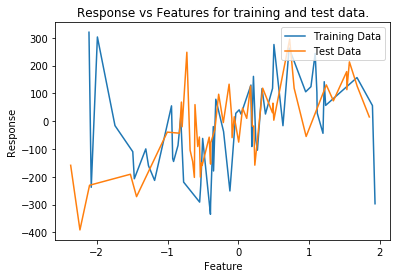

In [24]:
file = 'outliers_test.csv'
test = pd.read_csv(file)
test = test.sort_values('X')
file = 'outliers_train.csv'
train = pd.read_csv(file)
train = train.sort_values('X')
train.head()

plt.plot(train.X, train.Y, label = 'Training Data')
plt.plot(test.X, test.Y, label = 'Test Data')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Response vs Features for training and test data.')
plt.legend(loc = 'upper right')

print()
print("There's definitely a lot of noise in the training data,\
 especially at the first three points and at the very last point.")
print()
print("While there's still a bit of noise in the testing data,\
 it definitely appears we can fit a regression line through it!")

**5.2**

In [25]:
## Code here
feature = "X"
response = "Y"

X = sm.add_constant(train[feature])
OLSClass = sm.OLS(train[response], X)


OLSModel = OLSClass.fit()

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
 
The solution outlined for this problem suggests training a regression fit n times, where n = len(train.X), to find the first outlier. 
To find the subsequent outliers, we will have to run regressions n-1 times once the ourlier is removed, and again (n-2), for a total of n+n-1+n-2 = **3n-3 times**


**5.4**

In [26]:
## Code here

def find_outliers_simple(dataset_x, dataset_y, cases = 3) -> list:
    '''
    Function:
        Removes the three worst cases in our dataset, can be adjusted
    Logic:
        1 - loops through all possible cases, testing each R2 until all cases are tested.
        2 - worst is found, appended to a list. Does this process until all cases are exhuasted
    
    Args:
        dataset_x, dataset_y, and number of known outliers
    Returns:
        index of  bad data
    '''
    n = len(dataset_x)
    x = list(dataset_x)
    y = list(dataset_y)
    
    # we know there are 3 outliers
    outliers = cases
    
    # Initializing placeholders; least computationally intensive method i could come up with
    bad_x = []
    bad_y = []
    bad_r = []
    
    j = 0
    indexes = []
    
    while outliers != 0 :
        n = len(x)
        r_test = 1
        i = 0
        
        for i in range(n):
            
            x_reg = [j for j in x if j != x[i]]
            y_reg = [j for j in y if j != y[i]]
            
            r = sm.OLS(y_reg, sm.add_constant(x_reg)).fit().rsquared
            
            if  r < r_test:
                '''
                # Trouble-shooting :\
                print('----')
                print('outlier case: '+str(outliers))
                print("r tested: " + str(r_test))
                print("new r: " +str(r))
                print('found in x = ' + str(x[i]))
                print('----')
                '''
                r_test = r
                index = i
                
        indexes.append(index)
        bad_x.append(x[index])
        bad_y.append(y[index])
                
        x.remove(bad_x[j])
        y.remove(bad_y[j])
        
        j += 1
        outliers -= 1

    return(indexes)

bad_vals = find_outliers_simple(train[feature], train[response])
clean_train = train.drop(bad_vals)
OutlierFreeSimpleModel = sm.OLS(clean_train[response], sm.add_constant(clean_train[feature])).fit()

**5.5**


A cursory judgement would suggest no improvement; three points were removed from the data - this is hardly significant unless the total % of points removed was near 1/3 (and significant outliers).




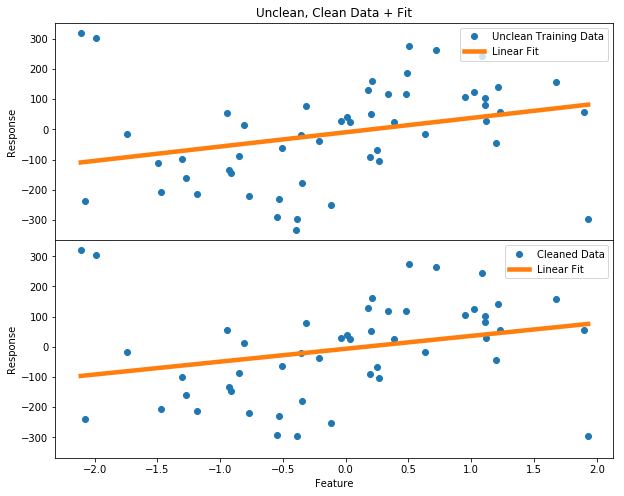

In [27]:
## Code for your plot here
bad_y, bad_x = solve_lin(OLSModel.params[1],
                         OLSModel.params[0],
                         train[feature])
clean_y, clean_x = solve_lin(OutlierFreeSimpleModel.params[1],
                             OutlierFreeSimpleModel.params[0], 
                             clean_train[feature])


fig, ((tr, te)) = plt.subplots(2, 1, sharex=True, sharey=True,
                        gridspec_kw={'hspace':0, 'wspace': 0},
                        figsize=(10,8))
tr.plot(train[feature], train[response], 'o', label='Unclean Training Data')
tr.plot(bad_x, bad_y, '-', linewidth = 4.5, label = 'Linear Fit')
tr.set_ylabel('Response')
tr.set_title('Unclean, Clean Data + Fit')
tr.legend(loc = 'upper right')

te.plot(clean_train[feature], clean_train[response], 'o', label='Cleaned Data')
te.plot(clean_x, clean_y, '-', linewidth = 4.5, label = 'Linear Fit')
te.set_xlabel('Feature')
te.set_ylabel('Response')
te.legend(loc = 'upper right')

print()
print("A cursory judgement would suggest no improvement; three points were removed from the data -\
 this is hardly significant unless the total % of points removed was near 1/3 (and significant outliers).")
print()
print()


**5.6**

In [28]:
## Code here
print()
print("ANS: ")
print()
print("The R2 for the new, outlier-free model is {:.{}f}".format( OutlierFreeSimpleModel.rsquared,3))
print("The R2 for the original model is {:.{}f}".format(OLSModel.rsquared,3))
print("It seems my algorithm made everything worse.")


ANS: 

The R2 for the new, outlier-free model is 0.073
The R2 for the original model is 0.084
It seems my algorithm made everything worse.


**5.7**

In [29]:
## Code here

def find_outliers_general(dataset_x, dataset_y, standard_dev = 5) -> list:
    '''
    Logic: Find values 2 standard deviations from the slope; remove them. Test again
    
    Args: dataset_x, dataset_y, and 
        a standard deviation value for testing (preset to 5; the data is ultra noisey)
    '''
    # Do a first-pass to clean the data; we know there's bound to be some messy points
    def generate_outliers(dataset_x=dataset_x, dataset_y=dataset_y, standard_dev=standard_dev):
        '''
            A helper method to do the same thing over and over.
        '''
        model = sm.OLS(dataset_y, sm.add_constant(dataset_x,)).fit()
        sdev = model.bse[1]*standard_dev
        m = model.params[1]
        b = model.params[0]
        errors = abs(dataset_y - (dataset_x*m+b))
        bools = errors >= sdev
        bools.index[bools]
        return(bools.index[bools].tolist())
    
    output = generate_outliers()
    errors = output
    while len(errors) > 0: # I think leaving in 3 outliers might be fine. 
        dataset_x2 = dataset_x.drop(output)
        dataset_y2 = dataset_y.drop(output)
        
        # increasing the standard error threshold, because we could actually remove everything if we're too tight.
        errors = generate_outliers(dataset_x2, dataset_y2, standard_dev*1.25)
        output.extend(errors)
    return(output)
    
    
outlier_indices = find_outliers_general(train[feature], train[response])


**5.8**

In [30]:
## Code here
clean_train = train.drop(outlier_indices)
OutlierNewModel = sm.OLS(clean_train[response], sm.add_constant(clean_train[feature])).fit()


print("There were {} outliers found the earlier solution,\
 whereas my solution identified {} outliers.".format(len(bad_vals),len(outlier_indices)))
print()
print("The values dropped in the earlier solution are outlined below: ")
print(train.iloc[bad_vals])
print()
inter =  pd.merge(train.iloc[outlier_indices], train.iloc[bad_vals], how='inner')
print("The newly removed values are outlined below, of which {} intersect with the table above: ".format(len(inter)))
print(train.iloc[outlier_indices])
print()
print("The intersecting values are outlined below: ")
print(inter)

print()
print("To compare the fits of the two models, the previous model achieved an R-squared of {:.{}f}".format( OutlierFreeSimpleModel.rsquared,3))
print("After removing the copious outliers, the new model achieved an R-squared of {:.{}f}".format( OutlierNewModel.rsquared,3))
print("The new method is light-years better than the original attempt.")


There were 3 outliers found the earlier solution, whereas my solution identified 36 outliers.

The values dropped in the earlier solution are outlined below: 
           X           Y
46 -2.078144 -237.873393
4  -1.491328 -109.710316
23  0.951024  105.731108

The newly removed values are outlined below, of which 2 intersect with the table above: 
           X           Y
38  1.676014  156.919503
17  1.114107   29.435448
13  1.894465   56.206488
11 -0.944167   55.239846
40  1.025546  124.064067
21 -0.915096 -144.897865
50 -2.110000  320.000000
32  0.382917   25.798098
29 -0.353799  -19.299877
46 -2.078144 -237.873393
0  -0.773019 -219.103753
6  -1.742547  -15.976455
9  -1.469421 -207.045450
14 -0.391668 -295.878637
12  0.011852   40.826401
34  0.334587  117.361476
23  0.951024  105.731108
19  0.177751  130.016397
5  -0.119129 -250.992560
25 -1.269279 -160.108014
52  1.931000 -297.000000
18 -1.307375  -99.695545
3  -0.350418 -179.034618
42 -1.182903 -213.000722
35 -0.546692 -291.094951
2

1. *What outliers does it identify?*
    

Answered above!

    
2. *How do those outliers compare to the outliers you found in 5.4?*


Answered above!


3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

Answered above!


---- 


In [31]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()